# Hotel Reviews: Basic Statistical Description of Reviews


In [2]:
import pandas as pd
import numpy as np

In [9]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv")
Hotel_Reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Find all unique Hotel Names

In [10]:
Hotel_Reviews.shape

(515738, 17)

In [11]:
AllHotels=Hotel_Reviews.Hotel_Name.unique()


In [12]:
AllHotels.size


1492

Preparation to store values for each Hotel as a separate dataframe

In [34]:
Hotel_name=np.array([])
mean_reviewer_rating=np.array([])

std_reviewer_rating=np.array([])
upper_outlier_threshold=np.array([])
lower_outlier_threshold=np.array([])
mean_average_score=np.array([])
outliers=np.array([])
no_of_review=np.array([])
min_rating=np.array([])
max_rating=np.array([])


In [35]:
for Hotel in AllHotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_rating=np.append(mean_reviewer_rating,TEMP['Reviewer_Score'].mean())
    std_reviewer_rating=np.append(std_reviewer_rating,TEMP['Reviewer_Score'].std())

    min_rating=np.append(min_rating,TEMP['Reviewer_Score'].min())
    max_rating=np.append(max_rating,TEMP['Reviewer_Score'].max())
    
    upper_outlier_threshold=np.append(upper_outlier_threshold,TEMP['Reviewer_Score'].mean()+(2*TEMP['Reviewer_Score'].std()))
    lower_outlier_threshold=np.append(lower_outlier_threshold,TEMP['Reviewer_Score'].mean()-(2*TEMP['Reviewer_Score'].std()))
    
    OUTLIERS=len(TEMP.loc[TEMP['Reviewer_Score']>TEMP['Reviewer_Score'].mean()+(2*TEMP['Reviewer_Score'].std())].index)
    OUTLIERS+=len(TEMP.loc[TEMP['Reviewer_Score']<TEMP['Reviewer_Score'].mean()-(2*TEMP['Reviewer_Score'].std())].index)
    outliers=np.append(outliers,OUTLIERS)
    
    mean_average_score=np.append(mean_average_score,TEMP['Average_Score'].mean())
    
    no_of_review=np.append(no_of_review,len(TEMP['Average_Score']))

The prepartion of the data frames requires the columns and the data

In [42]:
columns1=['Hotel_name','no_reviews','mean_reviewer_rating','std_reviewer_rating','min_rating','max_rating']
columns2=['Hotel_name','no_reviews','mean_average_score','upper_outlier_threshold','lower_outlier_threshold','no_outlier']



In [45]:
data1=np.column_stack((Hotel_name,no_of_review,mean_reviewer_rating,std_reviewer_rating,min_rating, max_rating))
data2=np.column_stack((Hotel_name,no_of_review, mean_reviewer_rating,upper_outlier_threshold,lower_outlier_threshold,outliers))


In [46]:
HotelReviewsDescriptiveAnalysis=pd.DataFrame(data1,columns=columns1)
HotelReviewsOutliers=pd.DataFrame(data2,columns=columns2)

In [47]:
HotelReviewsDescriptiveAnalysis.head()

,Hotel_name,no_reviews,mean_reviewer_rating,std_reviewer_rating,min_rating,max_rating
0,Hotel Arena,405.0,7.8362962962962985,1.8965161157600898,2.5,10.0
1,K K Hotel George,566.0,8.602826855123688,1.417423486428557,3.3,10.0
2,Apex Temple Court Hotel,1037.0,9.298842815814897,0.9238154323610933,2.5,10.0
3,The Park Grand London Paddington,1770.0,7.7114689265536525,1.8760152225398532,2.5,10.0
4,Monhotel Lounge SPA,35.0,8.848571428571429,1.0589593750390962,5.4,10.0


In [48]:
HotelReviewsOutliers.head()

,Hotel_name,no_reviews,mean_average_score,upper_outlier_threshold,lower_outlier_threshold,no_outlier
0,Hotel Arena,405.0,7.8362962962962985,11.629328527816478,4.043264064776119,18.0
1,K K Hotel George,566.0,8.602826855123688,11.437673827980802,5.767979882266573,27.0
2,Apex Temple Court Hotel,1037.0,9.298842815814897,11.146473680537083,7.45121195109271,48.0
3,The Park Grand London Paddington,1770.0,7.7114689265536525,11.46349937163336,3.959438481473946,79.0
4,Monhotel Lounge SPA,35.0,8.848571428571429,10.966490178649622,6.730652678493236,2.0


TODO:Some kind of visualisation

In [60]:
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']=='The Park Grand London Paddington']

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

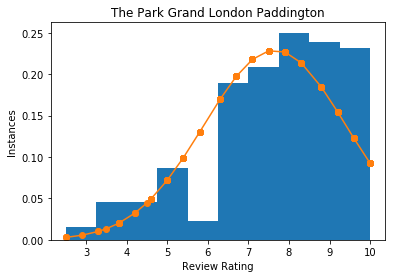

In [90]:
plt.hist(TEMP['Reviewer_Score'],normed=True)
plt.xlabel('Review Rating')
plt.ylabel('Instances')
plt.title("The Park Grand London Paddington");
data=TEMP['Reviewer_Score'].values
fit = stats.norm.pdf(data, TEMP['Reviewer_Score'].mean(), TEMP['Reviewer_Score'].std())  #this is a fitting indeed

plt.plot(TEMP['Reviewer_Score'],fit,'-o')


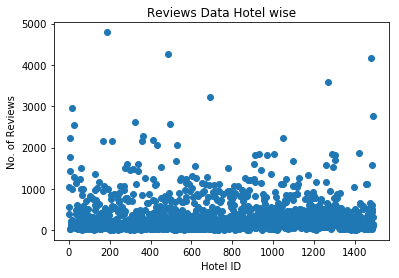

In [109]:
plt.plot(HotelReviews['no_reviews'],'o')
plt.xlabel('Hotel ID')
plt.ylabel('No. of Reviews')
plt.title("Reviews Data Hotel wise");

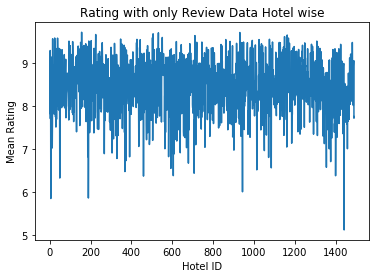

In [111]:
plt.plot(HotelReviews['mean_reviewer_rating'])
plt.xlabel('Hotel ID')
plt.ylabel('Mean Rating')
plt.title("Rating with only Review Data Hotel wise");

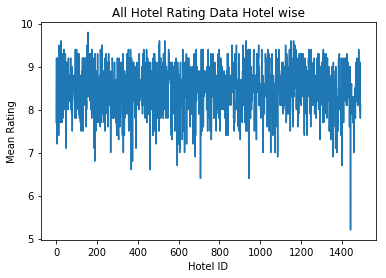

In [112]:
plt.plot(HotelReviews['mean_average_score'])
plt.xlabel('Hotel ID')
plt.ylabel('Mean Rating')
plt.title("All Hotel Rating Data Hotel wise");

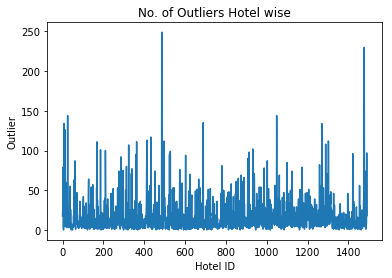

In [113]:
plt.plot(HotelReviews['no_outlier'])
plt.xlabel('Hotel ID')
plt.ylabel('Outlier')
plt.title("No. of Outliers Hotel wise");

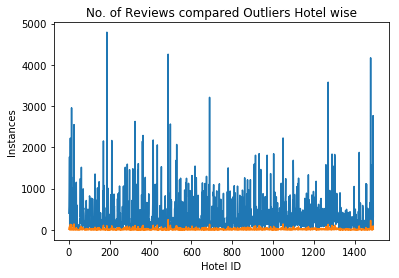

In [147]:
plt.plot( HotelReviews['no_reviews'])
plt.plot( HotelReviews['no_outlier'],label='No of Outliers')
plt.xlabel('Hotel ID')
plt.ylabel('Instances')
plt.title("No. of Reviews compared Outliers Hotel wise");

